In [ ]:
import keras
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# The data, split between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

num_classes = 10

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

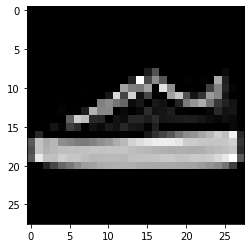

Category : 7


In [ ]:
ind = 5689
sample_image = X_train[ind] 
pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Category :',np.argmax(y_train[ind]))

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_train[0,:].shape

(28, 28, 1)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

#compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 128)       

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=1)

Epoch 1/5
469/469 [==============================] - 196s 415ms/step - loss: 0.5961 - accuracy: 0.7856 - val_loss: 0.3500 - val_accuracy: 0.8701
Epoch 2/5
469/469 [==============================] - 194s 413ms/step - loss: 0.3248 - accuracy: 0.8836 - val_loss: 0.2911 - val_accuracy: 0.8973
Epoch 3/5
469/469 [==============================] - 193s 412ms/step - loss: 0.2723 - accuracy: 0.9033 - val_loss: 0.2940 - val_accuracy: 0.8934
Epoch 4/5
469/469 [==============================] - 193s 412ms/step - loss: 0.2406 - accuracy: 0.9135 - val_loss: 0.2655 - val_accuracy: 0.9062
Epoch 5/5
469/469 [==============================] - 193s 411ms/step - loss: 0.2103 - accuracy: 0.9233 - val_loss: 0.2656 - val_accuracy: 0.9080


In [ ]:
history.history

{'loss': [0.5984476804733276,
  0.33546990156173706,
  0.27614179253578186,
  0.2465110868215561,
  0.21643291413784027],
 'accuracy': [0.7824833393096924,
  0.882099986076355,
  0.9024166464805603,
  0.9114000201225281,
  0.9228166937828064],
 'val_loss': [0.3718721270561218,
  0.29684096574783325,
  0.28125014901161194,
  0.24178676307201385,
  0.250260591506958],
 'val_accuracy': [0.8675000071525574,
  0.8899000287055969,
  0.8981000185012817,
  0.9124000072479248,
  0.9097999930381775]}

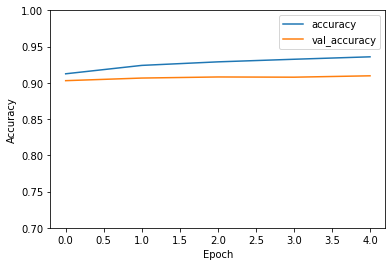

In [ ]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

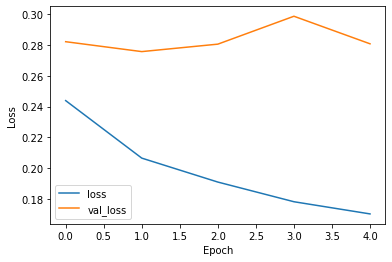

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

In [ ]:
predicted = model.predict(X_test)

313/313 [==============================] - 17s 53ms/step


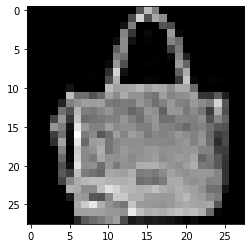

 Real label : 8
 Predicted label: 8


In [ ]:
ind = 2000
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

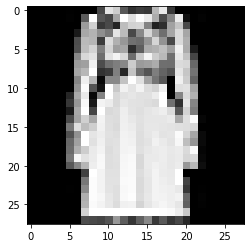

 Real label : 3
 Predicted label: 3


In [ ]:
ind = 1001
sample_image = X_test[ind]

pixels = sample_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(' Real label :',np.argmax(y_test[ind]))
print(' Predicted label:',np.argmax(predicted[ind]))

In [ ]:
labels_test_predicted = np.argmax(predicted, 1)

In [ ]:
labels_test_predicted

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
# first argument to pd.crosstab goes to rows, second to columns
# row_0 : real labels
# col_0 : predicted labels
pd.crosstab(np.argmax(y_test,axis=1),labels_test_predicted)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,828,1,17,25,4,0,118,1,6,0
1,1,987,0,6,3,0,3,0,0,0
2,19,1,866,8,48,0,58,0,0,0
3,13,4,10,930,20,0,21,0,2,0
4,1,1,76,35,834,0,51,0,2,0
5,0,0,0,0,0,984,1,6,0,9
6,89,2,70,26,61,0,743,0,9,0
7,0,0,0,0,0,13,0,970,0,17
8,1,1,0,3,0,1,2,1,991,0


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2808228135108948
Test accuracy: 0.9096999764442444
